INFO2950 Final Project
<br>
Wai Naing (wyn2) & Ethan Kahm (epk34)

# **Introduction** 

Cardiovascular disease has been the leading cause of death of Americans for the last 95 years and is a major cause of disability. Modern science has allowed us to identify some of the risk factors for cardiovascular disease, but due to so much variability in different lifestyles and individual health conditions, it is difficult to pinpoint just one area to focus on with complete scientific certainty. Our research project aims to look at a variety of health conditions and identify which condition or multiple conditions may play a larger impact on the development on CHD which may provide insight into which areas a patient may want to focus on to improve health. 

Research Question:

**What are the health risk factors that contribute most to the development of coronary heart disease?**


Our main findings were that the 4 best predictors of 10 year CHD risk are:

1. Age
2. Systolic Blood Pressure
3. Glucose Levels
4. Cigarettes per Day

Age isn't a factor that can be controlled. Based on the data however, it seems that monitoring blood pressure, lowering glucose levels, and reducing the amount of smoking will have the biggest impact on reducing the risk of CHD.

In [7]:
import pandas
import numpy
from matplotlib import pyplot as plt
import seaborn as sns

# **Data Description** 

### ***Observations and Attributes*** 

The observations (rows) represent different individuals. The attributes (columns) represent different health measures and conditions taken for these patients. Each row represents one patient and their various health conditions.


The definitions of each attribute are as shown:

Demographic:
- Sex: male or female(Nominal)
        0 = female
        1 = male
- Age: Age of the patient at exam (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- Education (Nominal)
        1 = some high school
        2 = high school / GED
        3 = some college / vocational school
        4 = college

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
        0 = no
        1 = yes
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical(history):
- BP Meds: whether or not the patient was using anti-hypertensive medication at the time of the exam (Nominal)
        0 = no
        1 = yes
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
        0 = no
        1 = yes
- Prevalent Hyp: whether or not the patient was hypertensive at the time of the exam. Hypertension was defined as if the subject has a mean systolic BP >= 140 or mean diastolic BP >= 90(Nominal)
        0 = no
        1 = yes
- Diabetes: whether or not the patient had diabetes. Diabetic according to exam with casual glucose of 200 mg/dL (Nominal)
        0 = no
        1 = yes

Medical(at time of exam):
- Tot Chol: serum cholesterol level (mg/dL) (Continuous)
- Sys BP: systolic blood pressure (mmHg) (Continuous)
- Dia BP: diastolic blood pressure (mmHg) (Continuous)
- BMI: Body Mass Index kg/m^2 (Continuous)
- Heart Rate: heart rate (BPM) (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: serum glucose level at time of exam (mg/dL) (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

### ***About the Dataset*** 

This dataset was created as part of the Framingham Heart Study. The study was a longitudinal, epidemiology focused study that was started in 1948 with 5,209 men and women and continued until 2008. As of 1999, there were only 993 participants still alive out of 5,209. The study seeks to analyze the changes in a person's health conditions and how certain risk factors could potentially contribute to heart disease. The cardiovascular diseased under investigation were:

- Coronary Heart Disease (CHD)
- Stroke
- Hypertension
- Peripheral Arterial Disease
- Congestive Heart Failure

The study took place in Framingham Massachusetts and was funded by Boston University and the NHLBI. The NHLBI is the National, Heart, Lung and Blood Institute which was part of the the National Institute of Health (NIH). Every patient in the study was aware of the data collection for the purpose of studying cardiovascular disease and due to privacy reasons, the indentities of the individuals participating in the study are anonymous.


Due to the long term nature of the study, time was certainly a factor that affected the collection of data. The data was supposed to be collected for each of the 5,209 enrollees biennially. However, data from every patient was not able to be collected every two years as it is a lot of people to follow up on. Additionally, some of the categories are up to the individual to self report such as being a smoker and how many cigarettes a day he or she was smoking which could potentially have been skewed. Additionally, some of the categories of data collection influence what data was actually collected. For example, the education column is only broken down into 4 broad categories and some individuals may have been shifted into a category that was the best fit. 


The dataset that was imported in the workbook was downloaded from kaggle, and is a preprocessed subset of the original Framingham Heart Study data taken from the dataset in 2017. This subset includes data on CHD, stroke and hypertension, but specifically looks at the 10 year risk of developing coronary heart disease.


The raw dataset file can be found at the link below:

https://drive.google.com/file/d/1_l9ptcbLYXKDAzMXy7ooyVQZOEcYplTU/view?usp=sharing

The curated dataset file can be found at the link below:

https://drive.google.com/file/d/1FrD7v2XudKIc9Y9bOdwI5vhBlAhl0JK9/view?usp=sharing


# **Preregistration Statement**

In order to explore our data, we will be performing an exploratory data anlysis. We will explore descriptive statistics and summary statistics for the nominal and continuous data. We will visualize the different categories utilizing histogrsms, boxplots, swarmplots to identify areas of further interest.

The first type of analysis that we pledge to perform on the dataset is logistic regression. In the context of our data, the outputs that we are looking for are binary as we are testing for an end result of “yes” or “no” for risk of CHD. Due to the binary format of our output, we are not able to utilize linear regression so we will perform regression analysis logistically and check whether our outputs are less than or greater than 0.5. We will additionally check the probability of outputs being 0 or 1 as we expect that data points will not be exactly 0 or 1. Logistic regression additionally works well for our dataset because we can perform an analysis on either categorical or continuous data. Each variable’s correlation to the output and their significance can also be calculated through this format. 

We will perform logistic regression with each variable and the 10 year CHD risk output.

We will also perform a multivariable logistic regression that factors in all the of the 15 data inputs.


# **Data Analysis** 

Our data analysis section is split into two categories. In the first, we have our initial exploration of the dataset and identification potential areas for further research. In the second, we we build models and test if our predictions are statistically significant.


## **Exploratory Data Analysis**

In the exploratory data section, it was decided that there must be a distinction in which different data types must be analyzed. This is because the dataset consists of both nominal and continous variables and the same kind of analysis cannot be performed on each individual variable.

In [8]:
stroke_data = pandas.read_csv("stroke_data.csv")

### ***Nominal Data*** 

For the variables that are nominal, all of them are binary except for education, which consists of four categories. Hence, count and frequency distrubtion of these categories' attributes will be the most useful statistic in providing an insight into identifying certain patterns. 

In [9]:
categorical_codes = pandas.DataFrame(columns = ['sex', 'education', 'current_smoker', 'BP_meds',
       'stroke_occurrence', 'hypertension', 'diabetes','10yr_CHD_risk'])

categorical_codes['sex'] = ["0 = female 1 = male"]
categorical_codes['education'] = ["1 = Some HS, 2 = HS/GED, 3 = Some College/Vocational, 4 = Univeristy"]
categorical_codes['current_smoker'] = ["0 = no 1 = yes"]
categorical_codes['BP_meds'] = ["0 = no 1 = yes"]
categorical_codes['stroke'] = ["0 = no 1 = yes"]
categorical_codes['hypertension'] = ["0 = no 1 = yes"]
categorical_codes['diabetes'] = ["0 = no 1 = yes"]
categorical_codes['stroke_occurrence'] = ["0 = no 1 = yes"]
categorical_codes['10yr_CHD_risk'] = ["0 = no 1 = yes"]

In [10]:
print("Descriptive Statistics for Nominal Data:",'\n')

nominal_col = stroke_data[["sex","education","current_smoker","BP_meds","stroke","hypertension","diabetes","10yr_CHD_risk"]]

for x in nominal_col:
    print(x)
    categories = stroke_data[x].value_counts().index.tolist()
    print(pandas.Categorical(stroke_data[x], categories = categories, ordered = True).describe())
    print('\n',categorical_codes[x][0],'\n')

Descriptive Statistics for Nominal Data: 

sex
            counts     freqs
categories                  
0             2034  0.556346
1             1622  0.443654

 0 = female 1 = male 

education
            counts     freqs
categories                  
1             1526  0.417396
2             1101  0.301149
3              606  0.165755
4              423  0.115700

 1 = Some HS, 2 = HS/GED, 3 = Some College/Vocational, 4 = Univeristy 

current_smoker
            counts     freqs
categories                  
0             1868  0.510941
1             1788  0.489059

 0 = no 1 = yes 

BP_meds
            counts     freqs
categories                  
0             3545  0.969639
1              111  0.030361

 0 = no 1 = yes 

stroke
            counts     freqs
categories                  
0             3635  0.994256
1               21  0.005744

 0 = no 1 = yes 

hypertension
            counts     freqs
categories                  
0             2517  0.688457
1             1139  0

**From the statistics provided above, a better understanding of the demographic data and certain behaviors is achieved.**

Sex: <br/> 
We are able to observe that there is a higher portion of females than males in this dataset. More specifically there are 412 more females than males. 

Education: <br/> 
There is a higher count of those with lower levels of education. In fact, the higher the level of education at each step, the lower the count gets. This means, there are more people with 'some HS' than 'HS/GED', more people with 'HS/GED" than 'Some College/Vocational', and more people with 'Some College/Vocational' than 'University'. 

Current Smoker: <br/> 
There are more current smokers in this dataset than non current smokers. However, the portions don't seem to differ too much as there is a difference in only 80 people, which amounts to 2% of the population. 

Blood Pressure Medication: <br/> 
An overwhelming majority of the people in this dataset, 97%, are not on blood pressure medication. 

Stroke: <br/> 
An overwhelming majority of the people in this dataset, 99.4% have never had a stroke. 

Hypertension: <br/> 
68.8% of the individuals in this study do not have hypertension while 31.1% have been diagnosed with hypertension. This could provide some interesting information as 97% of the subjects of this study are not on blood pressure medication. This means that there is a good portion of the participants who have been diagnosed with hypertension, but are not on medication.

Diabetes: <br/> 
An overwhelming majority of the people in this dataset, 97.3% do not have diabetes.

CHD Risk: <br/>
The majority of the people in this dataset, 84.8%, have not been diagnosed with a risk of coronary heart disease, while the remaining 15.2% have. 



### ***Nominal Data Visualization*** 

Bar graphs were displayed to better visualize the above mentioned statistics. Moreover, these graphs take into account the categorization of certain attributes by the 10 year coronary heart disease risk metric. 

Text(0.5, 0, '0 = female 1 = male \n sex')

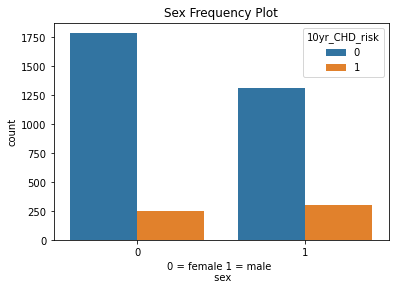

In [8]:
sns.countplot(x = 'sex', data = stroke_data[['sex']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Sex Frequency Plot')
plt.xlabel("0 = female 1 = male \n sex")

Text(0.5, 0, '1 = Some HS, 2 = HS/GED, 3 = Some College/Vocational, 4 = Univeristy \n Level of Education')

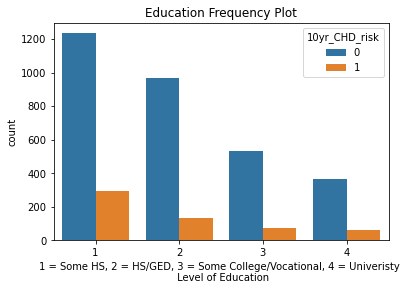

In [13]:
sns.countplot(x = 'education', data = stroke_data[['education']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Education Frequency Plot')
plt.xlabel("1 = Some HS, 2 = HS/GED, 3 = Some College/Vocational, 4 = Univeristy \n Level of Education")

Text(0.5, 0, '0 = no 1 = yes \n Smoking Status')

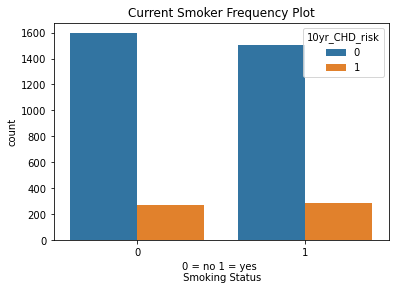

In [14]:
sns.countplot(x = 'current_smoker', data = stroke_data[['current_smoker']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Current Smoker Frequency Plot')
plt.xlabel("0 = no 1 = yes \n Smoking Status")

Text(0.5, 0, '0 = no 1 = yes \n Currently on Blood Pressure Meds')

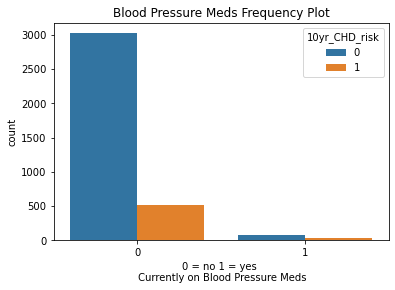

In [15]:
sns.countplot(x = 'BP_meds', data = stroke_data[['BP_meds']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Blood Pressure Meds Frequency Plot')
plt.xlabel("0 = no 1 = yes \n Currently on Blood Pressure Meds")

Text(0.5, 0, '0 = no 1 = yes \n Has had a Stroke in the Past')

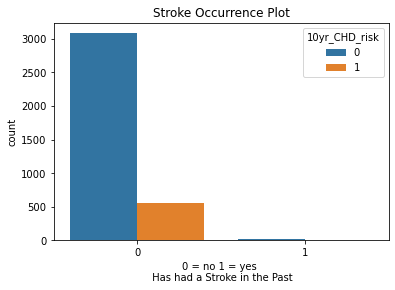

In [16]:
sns.countplot(x = 'stroke', data = stroke_data[['stroke']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Stroke Occurrence Plot')
plt.xlabel("0 = no 1 = yes \n Has had a Stroke in the Past")

Text(0.5, 0, '0 = no 1 = yes \n Diagnosed with Hypertension')

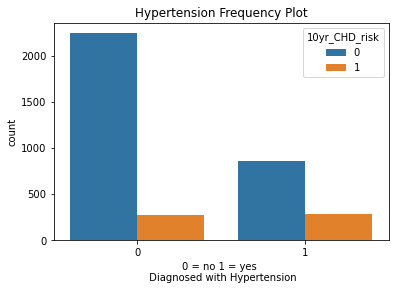

In [17]:
sns.countplot(x = 'hypertension', data = stroke_data[['hypertension']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Hypertension Frequency Plot')
plt.xlabel("0 = no 1 = yes \n Diagnosed with Hypertension")

Text(0.5, 0, '0 = no 1 = yes \n Diagnosed with Diabetes')

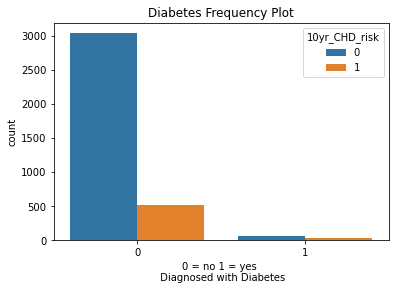

In [18]:
sns.countplot(x = 'diabetes', data = stroke_data[['diabetes']], hue = stroke_data['10yr_CHD_risk'])
plt.title('Diabetes Frequency Plot')
plt.xlabel("0 = no 1 = yes \n Diagnosed with Diabetes")

Text(0.5, 0, '0 = no 1 = yes \n Diagnosed with Risk of CHD')

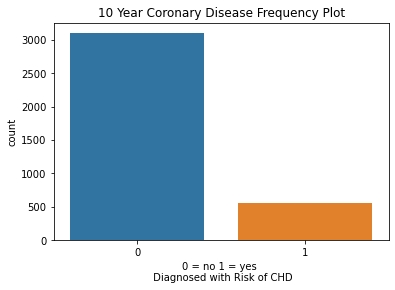

In [19]:
sns.countplot(x = '10yr_CHD_risk', data = stroke_data[['10yr_CHD_risk']])
plt.title('10 Year Coronary Disease Frequency Plot')
plt.xlabel("0 = no 1 = yes \n Diagnosed with Risk of CHD")

**There were certainly some interesting points that could be found from these graphs:**

- When looking at education, there was a clear linear decrease in CHD risk as education level rose. This may be an indication of how education plays a role in healthy livelihood and knowledge of risk factors for later conditions.
<br/> <br/>
- Previously, we believed that smoking would be a significant contributing factor in determining a person's CHD risk. However, the graph proved it to be false in this case. This is because, given that the distribution of the population that a person smokes or not is quite even with just a 2% difference, the count for those diagniosed with CHD risk is also quite even for both attributes. 
<br/> <br/>
- Hypertension seems to be a good indicator, and is positively correlated with CHD Risk. This is because while the portion of those diagnosed with hypertension is much lower than those not, the number of people diagnosed with CHD risk is about the same for both attributes. This means, there is a higher frequency and probability of a person with CHD Risk if they have hypertension. 
<br/>

### ***Continuous Data***

For categories with data that are continuous, it is helpful to observe their variability and distribution. Hence, the selected statistics to view were count, mean, standard deviation, minimum, maximum and the three percentiles: 25%, 50%, 75%. 

In [20]:
print("Descriptive Statistics for Continuous Data:")

stroke_data[ ["age","cigs_per_day","tot_chol","sys_BP","dia_BP","BMI","heart_rate","glucose"] ].describe()

Descriptive Statistics for Continuous Data:


,age,cigs_per_day,tot_chol,sys_BP,dia_BP,BMI,heart_rate,glucose
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,9.022155,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127
std,8.561133,11.918869,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128
min,32.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000
max,70.000000,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


The descriptive statistics for the nominal data have been described in the table above. It is difficult to discern many observations about the data in this numerical form as each variable's mean and standard deviation is based on different units of data. However, in a visual form, it is possible to more easily describe the data and report observations, patterns, and outliers.

### ***Continuous Data Visualization***

Below are visual representations for each of the continuous data attributes in the form of boxplots

Text(0, 0.5, 'Years')

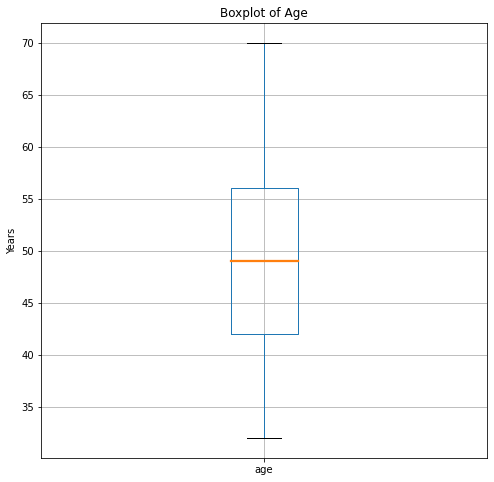

In [21]:
stroke_data.boxplot(column = "age",figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Boxplot of Age")
plt.ylabel("Years")

Text(0, 0.5, 'Number of Cigarettes')

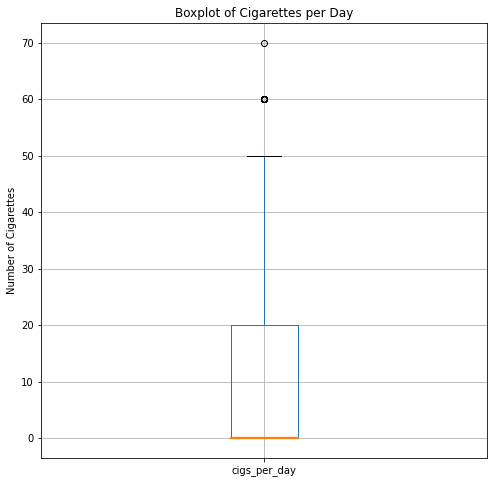

In [22]:
stroke_data.boxplot(column = "cigs_per_day",figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Boxplot of Cigarettes per Day")
plt.ylabel("Number of Cigarettes")

Text(0, 0.5, 'mg / dL of blood')

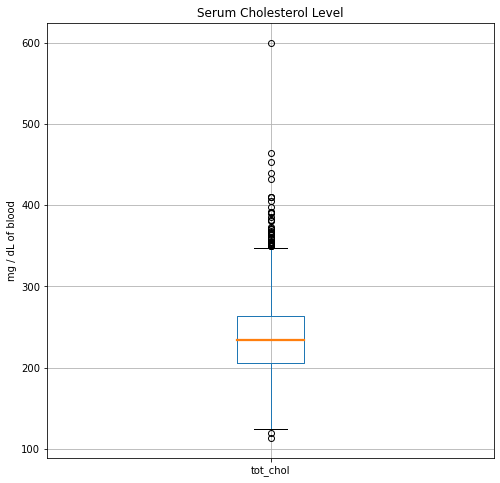

In [23]:
stroke_data.boxplot(column = "tot_chol",figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Serum Cholesterol Level")
plt.ylabel("mg / dL of blood")

Text(0, 0.5, 'mmHg')

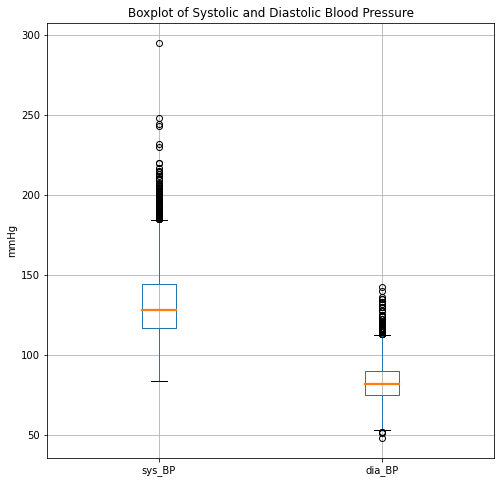

In [24]:
stroke_data.boxplot(column = ["sys_BP","dia_BP"],figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Boxplot of Systolic and Diastolic Blood Pressure")
plt.ylabel("mmHg")

Text(0, 0.5, 'kg/m^2')

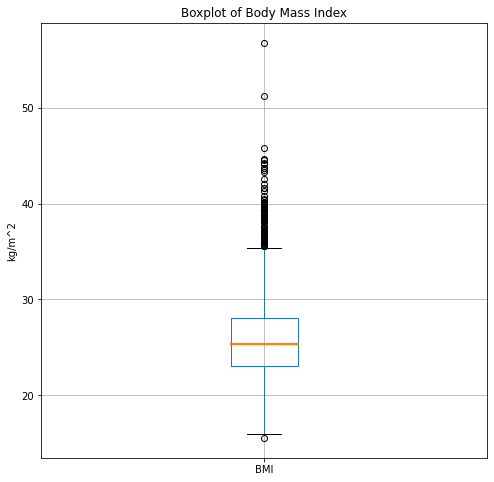

In [25]:
stroke_data.boxplot(column = "BMI",figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Boxplot of Body Mass Index")
plt.ylabel("kg/m^2")

Text(0, 0.5, 'BPM (Beats per Minute)')

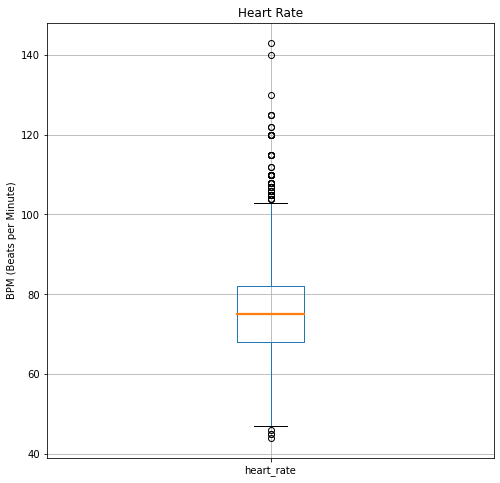

In [26]:
stroke_data.boxplot(column = "heart_rate",figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Heart Rate")
plt.ylabel("BPM (Beats per Minute)")

Text(0, 0.5, 'mg / dL')

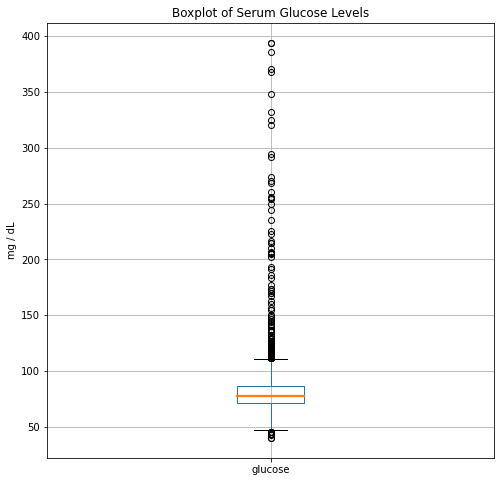

In [27]:
stroke_data.boxplot(column = "glucose",figsize = (8,8), medianprops = dict(linestyle='-', linewidth=2.25))
plt.title("Boxplot of Serum Glucose Levels")
plt.ylabel("mg / dL")

The continuous data in the format of boxplots gives some interesting information of the distribution of data and also provides some more points for further explanation as we move on to more in depth analyses. 

In terms of the boxplots presented, many of the attributes have a wide distributions with many outliers outside the of fences. 

In particular it seems that glucose data is the most skewed to the right with the highest serum glucose concentrations reaching close to 400 mg/dL. Relative to the size of the actual box, the outliers that are values higher than Q3 (75th percentile, extend far out. The variation in this data helps identify an attribute for further analysis, especially for comparing to risk of CHD. This could potentially lead to an interesting finding as high glucose does have implications for obesity, but it is not directly related to cardiovascular disease. 

Serum cholesterol levels, systolic and diastolic blood pressure, BMI, and heart rate are also all skewed to the right, but relative to each other, none have data distributed as far right as the serum glucose levels boxplot does. 

However, out of these data, another interesting observation is the cigarettes per day boxplot. The first quartile and median are both 0 cigarettes which makes sense because non smokers report 0 cigarettes and there are many more non-smokers than smokers. Even with including the subjects who reported 0 cigarettes per day, the mean cigarettes smoked per day was approximately 9. This indicates that those who do smoke are smoking a significant number of cigarettes per day and in the case of the two extreme outliers, those subjects are smoking 60 and 70 cigarettes per day, respectively. What is interesting about this finding is the relationship the smoking boxplot has to the nominal data visualization of whether or not the subject was a current smoker. From the nominal data, almost no difference was observed between the prevalence of smoking between the subjects who had a risk for CHD and those who did not have a risk for CHD which is especially interesting because the continuous data demonstrates that smokers are going through a significant number of cigarettes everyday. Perhaps the amount one smokes isn't as strong of a predictor of CHD risk. 
<br/> <br/> 

Below are visual representations for each of the continuous data attributes in the form of swarmplots. The swarmplots show the frequency of data at any given class of points compared for the group with a risk of CHD and the group without a risk of CHD.

/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Age for Subjects With and Without CHD Risk')

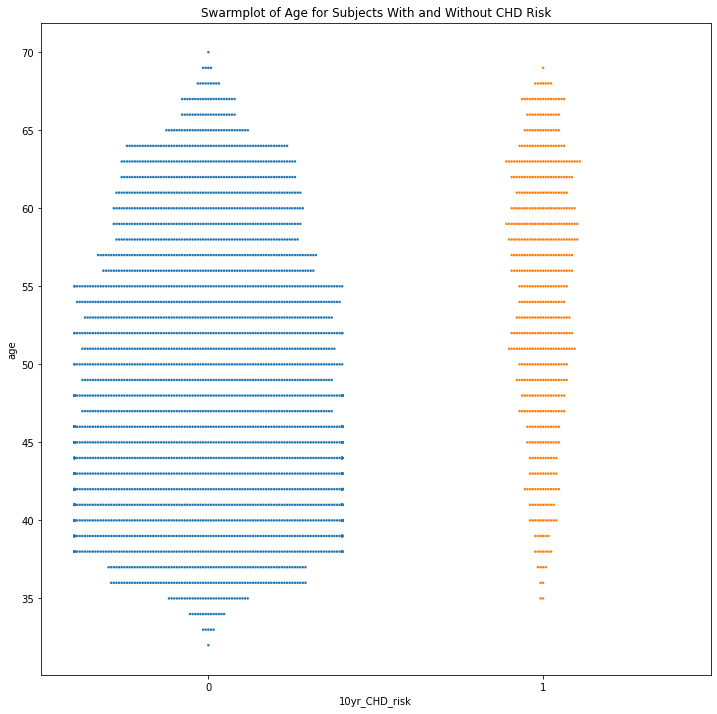

In [52]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='age', x='10yr_CHD_risk', data=stroke_data, size = 2.5)
plt.title("Swarmplot of Age for Subjects With and Without CHD Risk")

/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Cigarettes per Day for Subjects With and Without CHD Risk')

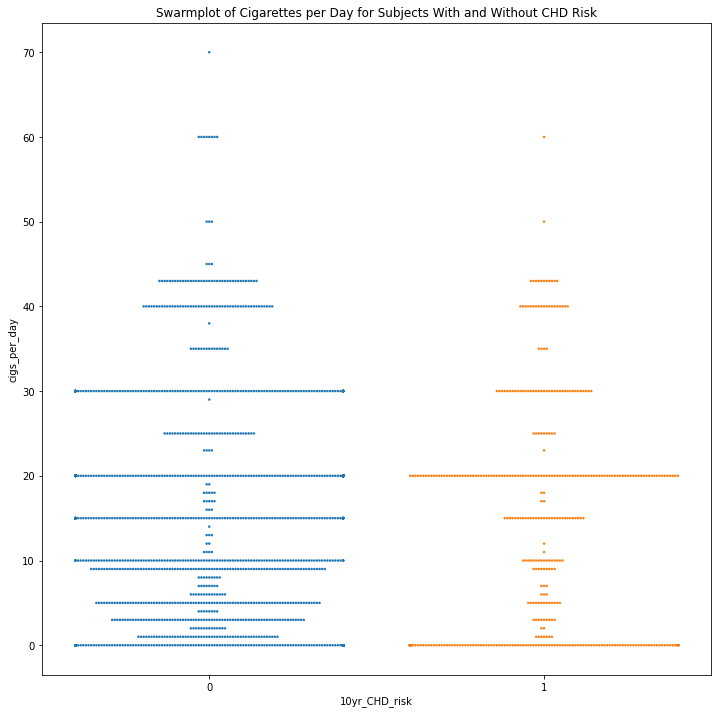

In [53]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='cigs_per_day', x='10yr_CHD_risk', data=stroke_data, size = 2.5)
plt.title("Swarmplot of Cigarettes per Day for Subjects With and Without CHD Risk")

/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Serum Cholesterol for Subjects With and Without CHD Risk')

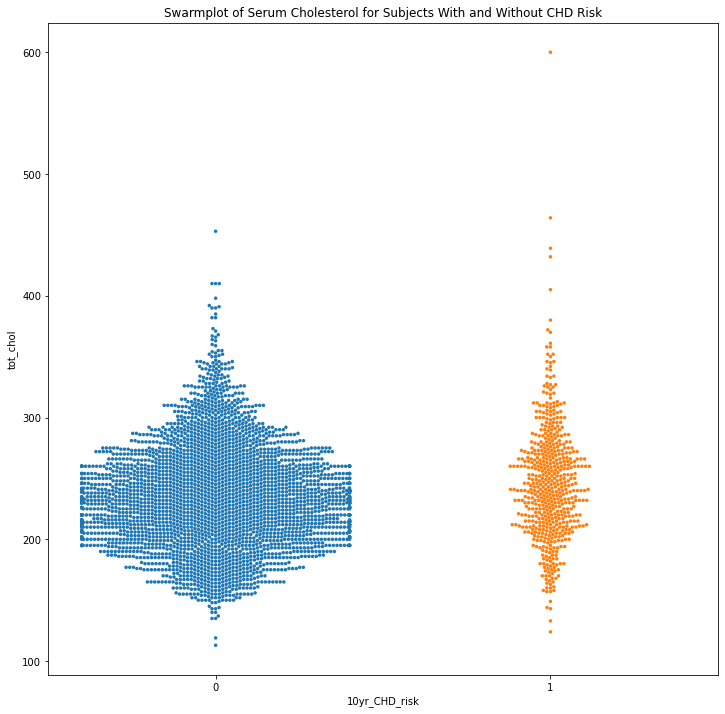

In [54]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='tot_chol', x='10yr_CHD_risk', data=stroke_data, size = 3.5)
plt.title("Swarmplot of Serum Cholesterol for Subjects With and Without CHD Risk")

/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Systolic Blood Pressure for Subjects With and Without CHD Risk')

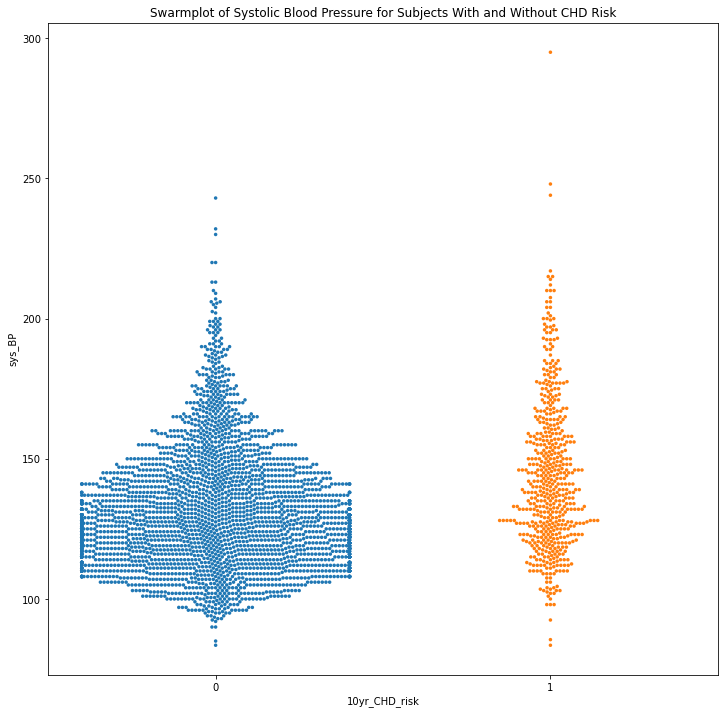

In [55]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='sys_BP', x='10yr_CHD_risk', data=stroke_data, size = 3.5)
plt.title("Swarmplot of Systolic Blood Pressure for Subjects With and Without CHD Risk")

Text(0.5, 1.0, 'Swarmplot of BMI for Subjects With and Without CHD Risk')

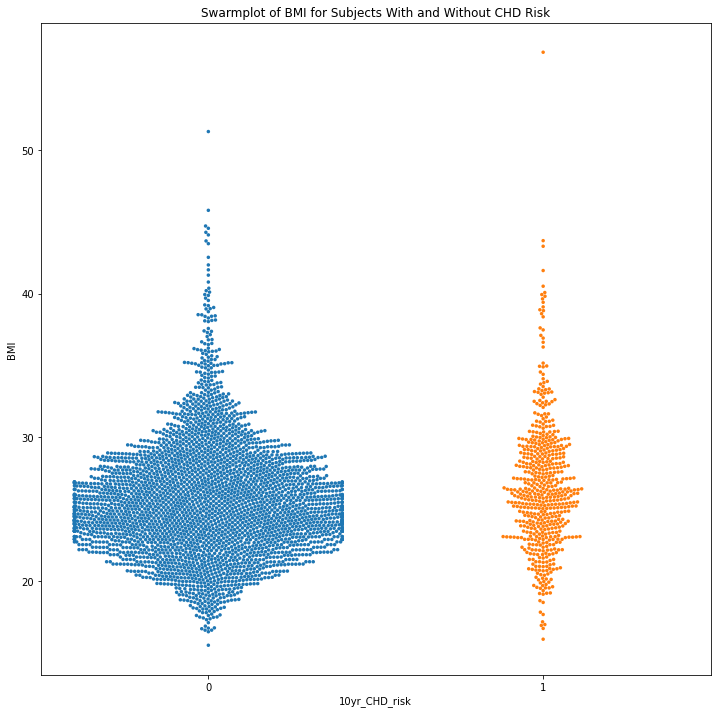

In [56]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='BMI', x='10yr_CHD_risk', data=stroke_data, size = 3.5)
plt.title("Swarmplot of BMI for Subjects With and Without CHD Risk")

/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Heart Rate for Subjects With and Without CHD Risk')

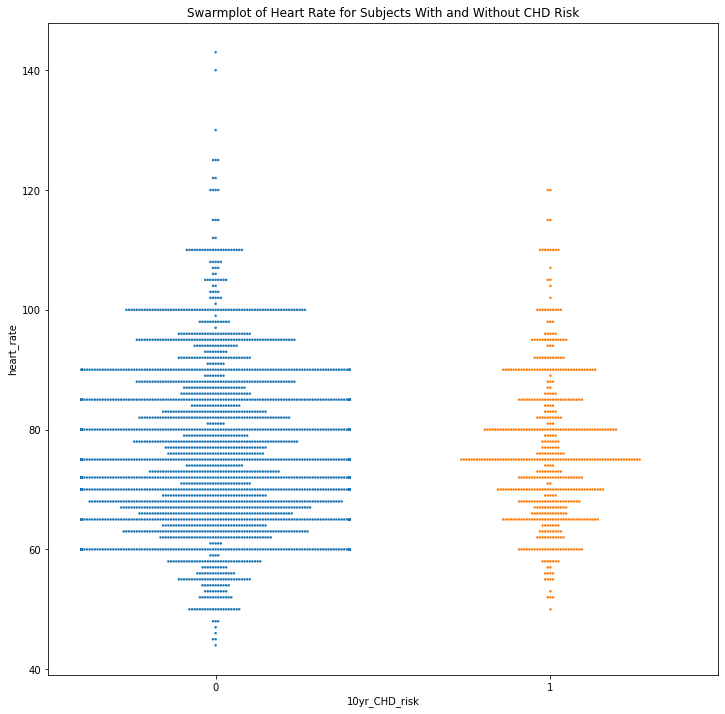

In [57]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='heart_rate', x='10yr_CHD_risk', data=stroke_data, size = 2.5)
plt.title("Swarmplot of Heart Rate for Subjects With and Without CHD Risk")

/opt/anaconda3/envs/INFO2950/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot of Serum Glucose for Subjects With and Without CHD Risk')

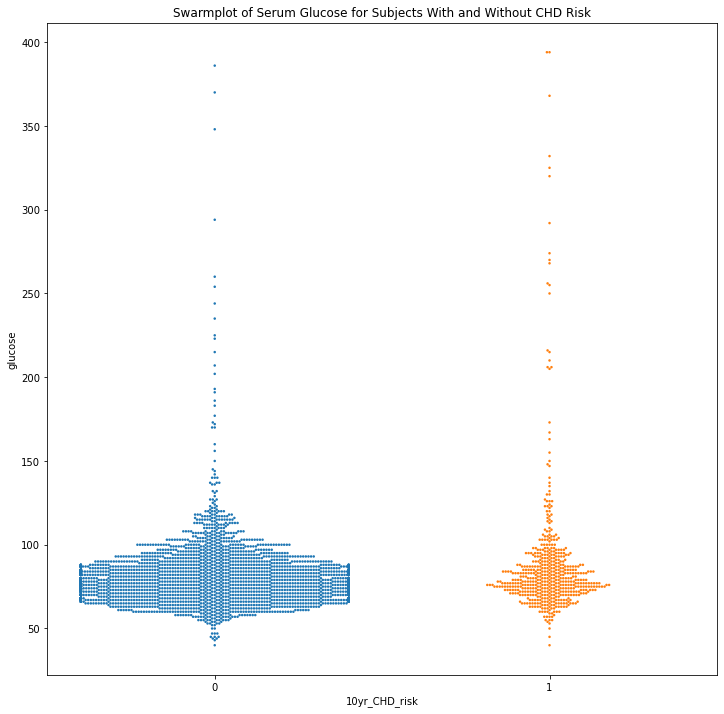

In [58]:
plt.figure(figsize=(12,12))
sns.swarmplot(y='glucose', x='10yr_CHD_risk', data=stroke_data, size = 2.5)
plt.title("Swarmplot of Serum Glucose for Subjects With and Without CHD Risk")

The swarmplots give another visual representation of our continuous attributes. By examining frequency at different classes, we can confirm the observations we made from the boxplots about most of these attributes being skewed to the right.

Here we can clearly see that those who do not have a CHD risk comprise a much larger proportion of the data set than those who do. Additionally, by examining the shape of these plots across the two CHD groups, it seems that the shape actually does have some similarities between the two group. It will certainly be necessary to implement more advanced statistical techniques to elicit specific patterns and indications across both the nominal and continuous variables.

<br/><br/>

Text(0.5, 1.0, 'Correlational Heat Map of Continuous Variables')

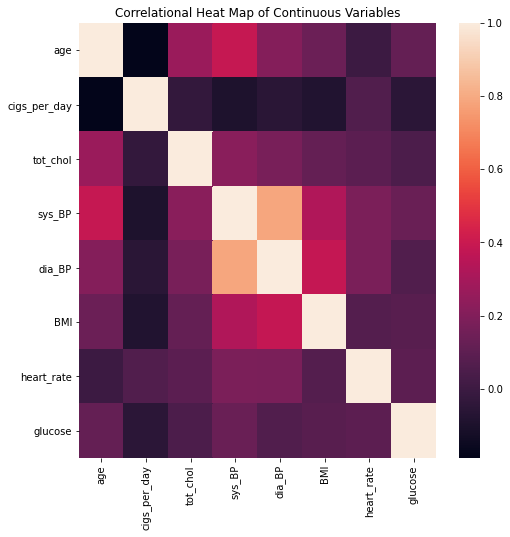

In [59]:
stroke_data_corr = stroke_data[["age","cigs_per_day","tot_chol","sys_BP","dia_BP","BMI","heart_rate","glucose"]].corr()
plt.figure(figsize = (8,8))
sns.heatmap(stroke_data_corr)
plt.title("Correlational Heat Map of Continuous Variables")

The above correlational heatmap shows the correlations between the different continuous variable. During further regression analysis, we will be examining the relationships these variables have to the group of subjects that have been indicated for a risk of CHD. However, it is interesting to see how the continuous variable are related to one another, especially in cases where one factor isn't known to have a huge impact on another. There seems to be a fairly strong correlation between age and systolic blood pressure and between BMI and systolic as well as diastolic blood pressure. The strong correlation between systolic and diastolic blood pressure stems from the relationship these two measures have with each other. This makes sense because systolic BP is the pressure your heart exerts while beating and diastolic BP is the pressure in your ateries between beats.

We hope to continue our data analysis with more complex statistical methods as continue to discover our relationships between certain variables. We plan on using logistic regression, kmeans and decision tree classifier to analyze the relationships between continuous data and nominal data with the output which is in a binary form.

## **Model Building** 

The exploratory data analysis section gave us an overview of the descriptive statistics and visual representations of the spread of our data. However, just by looking at the numbers and shape of our graphs isn't enough to examine the relationships between our inputs and the 10 year CHD risk output. In our next section, we will be performing logistic regression to analyze the relationships in the dataset and compare the variables by examining regression coefficient to determine which variable have the most weight in the model.

### ***Logistic Regression*** 

We start by building logistic regression models for each variable individually. Each variable has its own single variable logistic regression model with the same 10 year CHD risk output.

In [11]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler

import numpy as np
from matplotlib import pyplot

In [17]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

In [18]:
#logistic regression coefficients using normal data

column = stroke_data.iloc[:,:15].columns.tolist()

for x in column:
    predict = LogisticRegression().fit(stroke_data[[x]], stroke_data["10yr_CHD_risk"])
    coefficient = predict.coef_[0][0]
    print(x + " regression coefficient = {:.7f}".format(coefficient),"\n")

sex regression coefficient = 0.5060628 

age regression coefficient = 0.0776713 

education regression coefficient = -0.1800568 

current_smoker regression coefficient = 0.1058277 

cigs_per_day regression coefficient = 0.0115303 

BP_meds regression coefficient = 1.0235933 

stroke regression coefficient = 1.0256788 

hypertension regression coefficient = 0.9956593 

diabetes regression coefficient = 1.1050826 

tot_chol regression coefficient = 0.0054986 

sys_BP regression coefficient = 0.0246449 

dia_BP regression coefficient = 0.0326451 

BMI regression coefficient = 0.0525042 

heart_rate regression coefficient = 0.0047062 

glucose regression coefficient = 0.0102134 



Higher regression coeffcients indicate more weight in the model and a potentially better predictor for the output. From this set, the variables that have the highest regression coefficients are:

1. Diabetes
2. Stroke
3. Blood Pressure Medication
4. Hypertension

These four variables are all nominal inputs meaning that for each of these variables, the input is either 0 = yes or 1 = no

For these single variable logistic regression inputs, it does make sense that Stroke, Blood Pressure Medication, and Hypertension have high regression coefficients. From a medical standpoint, stroke, blood pressure, and hypertension are all related to cardiovascular health. Diabetes does have downstream implications for heart disease but isn't as related as the first 3 variables. The fact that it has the highest regression coefficient in this dataset indicates that it is a variable to keep a look out for.

Next, we created scatterplots of each variable and the 10 year CHD risk output. On top of each scatterplot we graphed the logit probability function adjusted to each logistic regression model's specific coefficient and intercept. We did this to gain a visual understanding of which models may have the best shape and be the most accurate predictors.

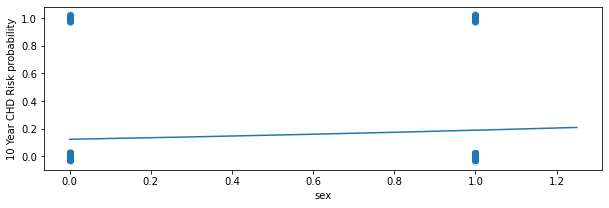

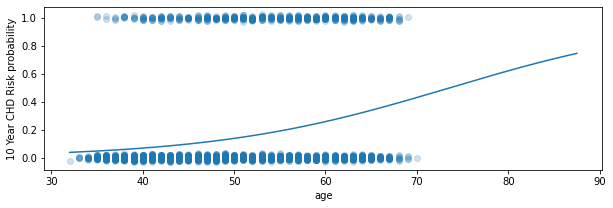

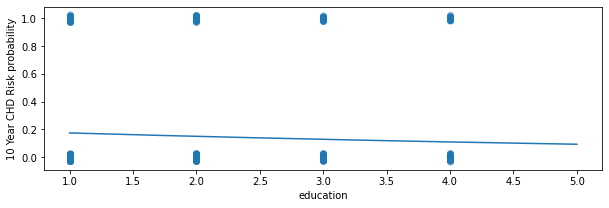

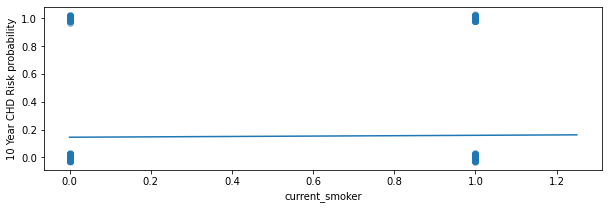

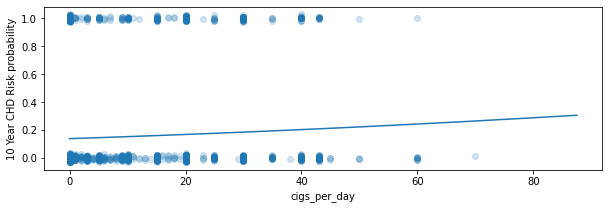

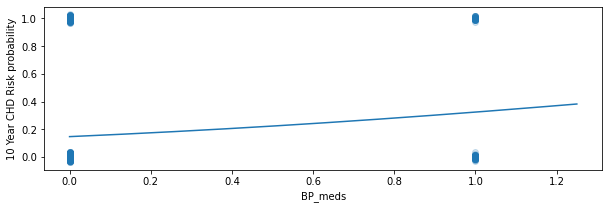

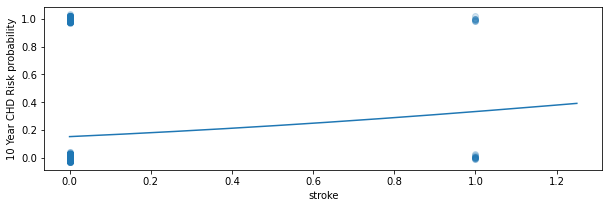

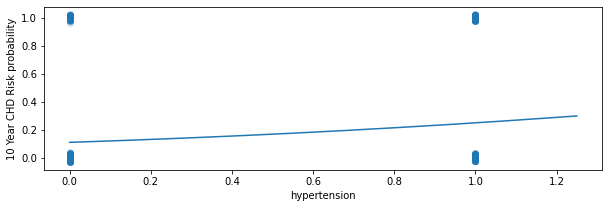

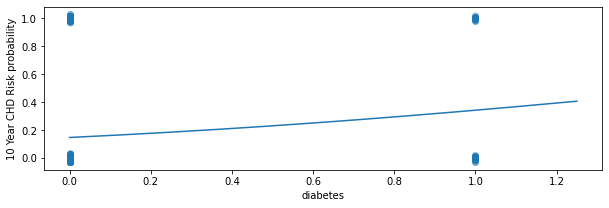

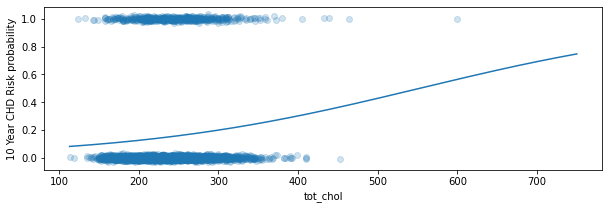

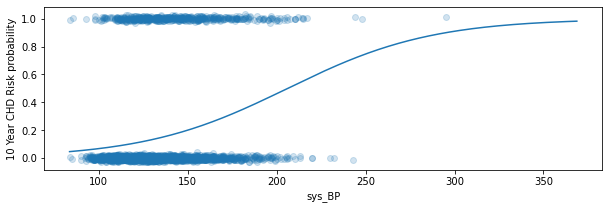

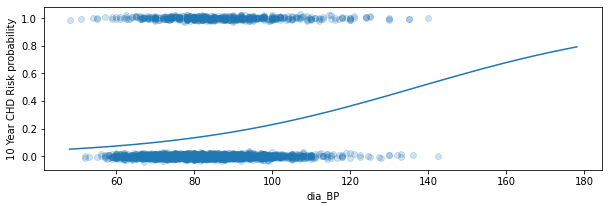

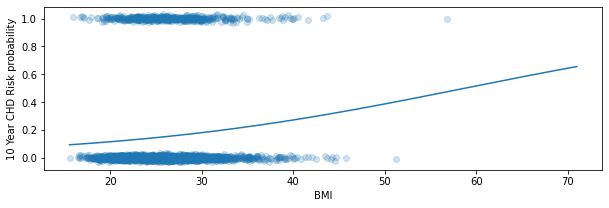

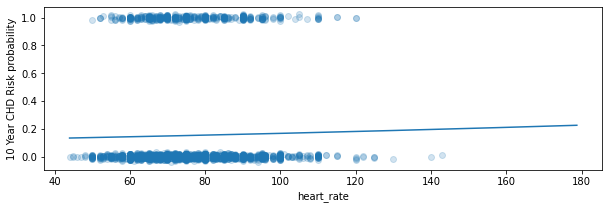

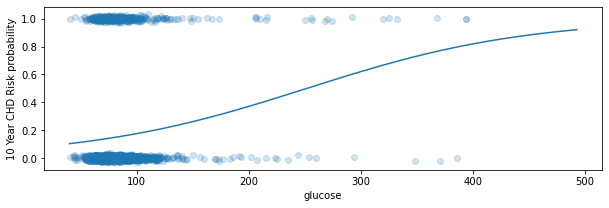

In [19]:
#graphs of logit function using regression coefficients from normal data

column = stroke_data.iloc[:,:15].columns.tolist()

for x in column:
    
    predict = LogisticRegression().fit(stroke_data[[x]], stroke_data["10yr_CHD_risk"])
    
    x_values = np.linspace(stroke_data[x].min(), stroke_data[x].max()*1.25, 200)
    pyplot.figure(figsize = (10,3))
    pyplot.scatter(stroke_data[x], stroke_data["10yr_CHD_risk"] + np.random.normal(0, 0.01, size=len(stroke_data)), alpha=0.2)

    pyplot.plot(x_values, logit(x_values * predict.coef_[0,0] + predict.intercept_[0]))
    pyplot.xlabel(x)
    pyplot.ylabel("10 Year CHD Risk probability")

### ***Logistic Regression - Scaled***

By looking at the logit probabiliy functions graphed on top of the scatterplots, it seems as though glucose and systolic blood pressure have the best shape and perhaps will be the most accurate predictors of 10 year CHD risk. 

Below we are scaling our data set so that all the continuous variables lie between 0 and 1. This is more consistent with the values of the categorical variables that take on the meaning of 'yes' and 'no'. We want to see if having the inputs on a consistent scale would be better for the regression model as the inputs would be more similar in value. We additionally know that for our multivariable regression model later on, we will need to use scaled inputs.

In [20]:
mms = MinMaxScaler(feature_range = (0,1))

In [21]:
df = stroke_data.iloc[:,:15].copy()

for x in df:
    mms = MinMaxScaler(feature_range = (0,1))
    df[x] = mms.fit_transform(df[[x]])
    
df.head()

,sex,age,education,current_smoker,cigs_per_day,BP_meds,stroke,hypertension,diabetes,tot_chol,sys_BP,dia_BP,BMI,heart_rate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119


We are utilizing these scaled values to perform a series of single variable logistic regression analyses on each input value with the output being 10 year risk for CHD. Below, we have calculated each regression coefficient and have additionall attempted to graph the logit functions for each of these variables under the single variable logistic regression model.

In [22]:
#logistic regression coefficients using scaled data

column = df.columns.tolist()

for x in column:
    predict = LogisticRegression().fit(df[[x]], stroke_data["10yr_CHD_risk"])
    coefficient = predict.coef_[0][0]
    print(x + " regression coefficient = {:.7f}".format(coefficient),"\n")

sex regression coefficient = 0.5060628 

age regression coefficient = 2.8201175 

education regression coefficient = -0.5306348 

current_smoker regression coefficient = 0.1058277 

cigs_per_day regression coefficient = 0.7571268 

BP_meds regression coefficient = 1.0235933 

stroke regression coefficient = 1.0256788 

hypertension regression coefficient = 0.9956593 

diabetes regression coefficient = 1.1050826 

tot_chol regression coefficient = 2.1579874 

sys_BP regression coefficient = 4.4705990 

dia_BP regression coefficient = 2.7552717 

BMI regression coefficient = 1.8126129 

heart_rate regression coefficient = 0.4082584 

glucose regression coefficient = 2.7573588 



In the unscaled data, the 4 variables with the highest regression coefficients were: diabetes, stroke, BP_meds, and hypertension.

From this set of scaled data values, the variables that have the highest regression coefficients are:

1. Systolic Blood Pressure
2. Age
3. Diastolic Blood Pressure
4. Glucose

For the models with the unscaled data, the four variables with the highest regression coefficients were all nominal inputs meaning that for each of these variables, the input is either 0 = yes or 1 = no

For the scaled dataset, these four variables are continuous. This is interesting because now that all the data is between the range of 0 and 1, it seems that continuous variables could potentially be more accurate for a logistic regression model that predicts CHD risk.

Although there are inconsistencies in the variables that have the highest regression coefficients in the unscaled and scaled data set, there is some reassurance in the relationship between these two sets of variables based off of medical knowledge. Health conditions worsen as age increases so there is no surprise there. Additionally, the two blood pressure variables are related to the blood pressure meds nominal variable as blood pressure is an indicator for the necessity of blood pressure medication. Finally, glucose is commonly used in the medical world as an indicator for having diabetes. 

In the multivariable logistic regression model we will be building later, we will need to use scaled data points. Therefore, we expect that there will be consistencies between the variables with the highest regression coefficients in this set of individual logistic regression models with the scaled data and the variables with the highest regression coefficients in the multivariable model.

Next, we created scatterplots of each scaled variable and the 10 year CHD risk output. On top of each scatterplot we graphed the logit probability function adjusted to each logistic regression model's specific coefficient and intercept. We did this to gain a visual understanding of which models may have the best shape and be the most accurate predictors.

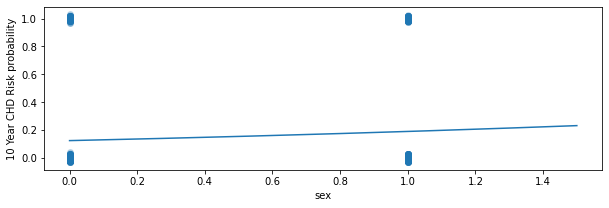

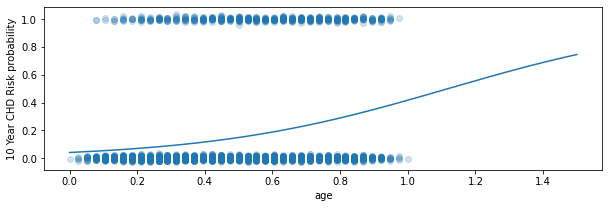

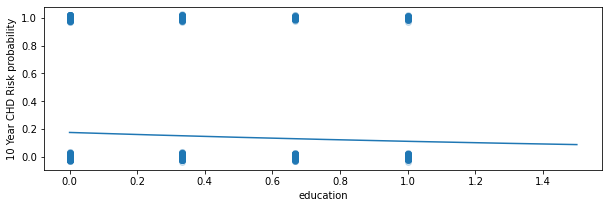

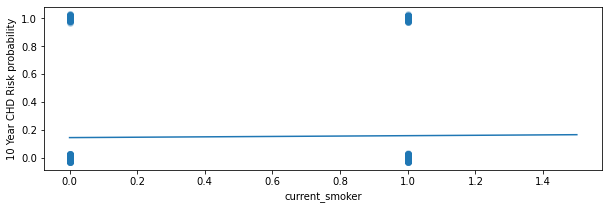

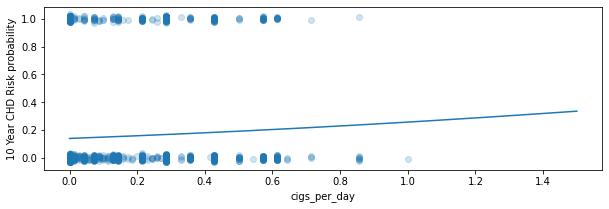

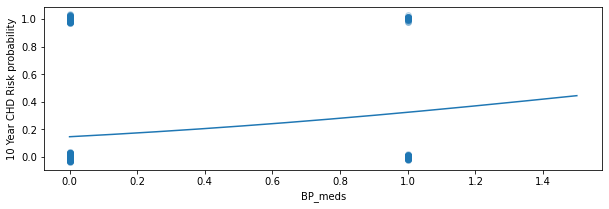

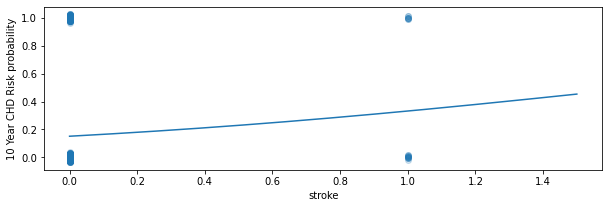

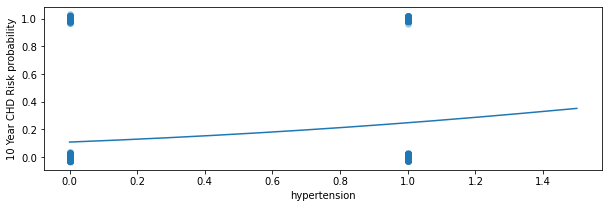

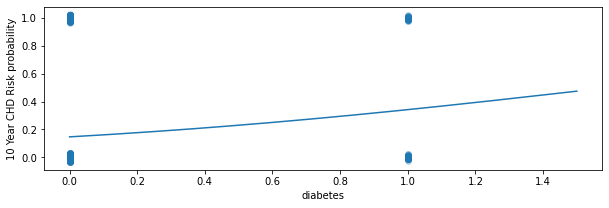

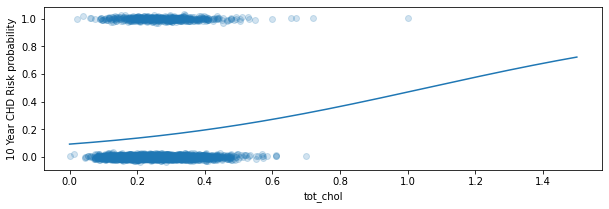

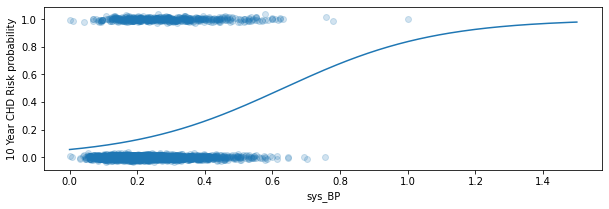

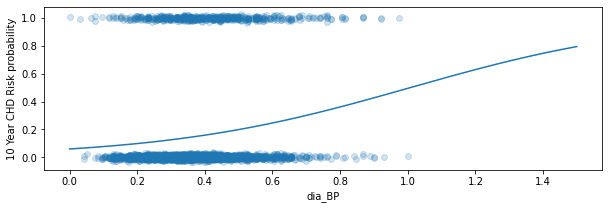

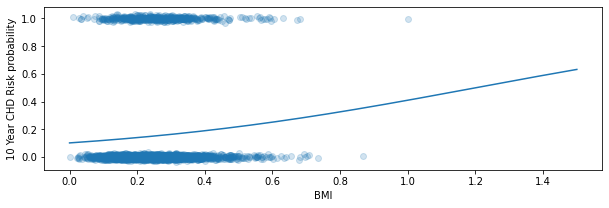

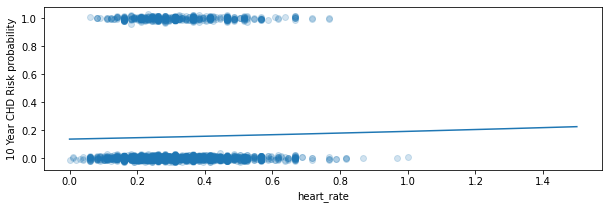

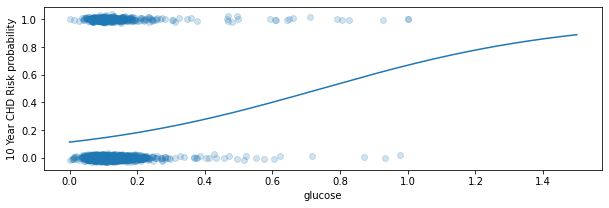

In [23]:
#graphs of logit function using regression coefficients from scaled data

column = df.columns.tolist()

for x in column:
    
    predict = LogisticRegression().fit(df[[x]], stroke_data["10yr_CHD_risk"])
    
    x_values = np.linspace(0, df[x].max()*1.5, 200) 
    pyplot.figure(figsize = (10,3))
    pyplot.scatter(df[x], stroke_data["10yr_CHD_risk"] + np.random.normal(0, 0.01, size=len(df)), alpha=0.2)

    pyplot.plot(x_values, logit(x_values * predict.coef_[0,0] + predict.intercept_[0]))
    
    pyplot.xlabel(x)
    pyplot.ylabel("10 Year CHD Risk probability")

By looking at the scaled data logit probabiliy functions graphed on top of the scatterplots, it seems as though glucose and systolic blood pressure have the best shape and perhaps will be the most accurate predictors of 10 year CHD risk. This is consistent to the plots from the unscaled data and is also consistent with the four scaled variables with the highest regression coefficients further corroborating the indication that they have more weight in predicint 10 year CHD risk.

### ***Multi Variable Logistic Regression*** 

Our next task was to create a multi variable regression model utilizing all the inputs in our dataset. This is a logical next step as it is important to remember that many patients will be diagnosed with multiple conditions simultaneously. Thus, we can create a more accurate model for predicting CHD by factoring in all the inputs simultaneously.

In [24]:
#regression coef scaled data

x = df.iloc[:,:15]
y = stroke_data["10yr_CHD_risk"]

model = LogisticRegression().fit(x,y)

model.coef_

array([[ 0.53089568,  2.37841791, -0.16688688,  0.11191348,  1.03558851,
         0.21046625,  0.55489638,  0.32030048,  0.28148317,  0.92534501,
         2.12996141,  0.14078899,  0.22373234, -0.19877257,  1.63230541]])

In [25]:
intercept = model.intercept_[0]

print ("multi variable logistic regression intercept = {:.4f}".format(intercept))

multi variable logistic regression intercept = -4.5168


In [26]:
x = df.iloc[:,:15]
y = stroke_data["10yr_CHD_risk"]

LR = LogisticRegression()

coef = pandas.DataFrame(numpy.array(LR.fit(x,y).coef_).reshape(-1,1), columns = ["Coefficient"])

coef["variable"] = df.columns.tolist()

coef

,Coefficient,variable
0,0.530896,sex
1,2.378418,age
2,-0.166887,education
3,0.111913,current_smoker
4,1.035589,cigs_per_day
5,0.210466,BP_meds
6,0.554896,stroke
7,0.320300,hypertension
8,0.281483,diabetes
9,0.925345,tot_chol


Listed above are the regression coefficients for each individual variable within our multi variable logistic regression model. These coefficients listed are specific to each variable given that all other variable are held constant. A higher regression coefficient indicates that a variable holds more weight in the logistic regression model and is a better predictor for our output of 10 year CHD risk. 

In this multivariable logistic regression model, the variables with the highest regression coefficients are:

1. Age
2. Systolic Blood Pressure
3. Glucose
4. Cigarettes Per Day

In the previous scaled single variable models, the four variables with the highest regression coefficients were: 
- Systolic Blood Pressure, Age, Diastolic Blood Pressure, Glucose

Given the consistencies between 3 of the 4 variables from the previous section, it seems as though we are starting to gain a more clear idea of which variables carry the most weight.

Now that we have the regression coefficients, we are utilizing the logit function to calculate the 10 year CHD risk probabilities associated with each variable.

In [27]:
import numpy as np
from matplotlib import pyplot

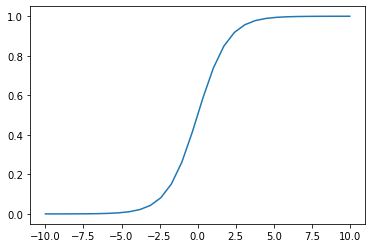

In [28]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

x_values = np.linspace(-10, 10, 30)

pyplot.plot(x_values, logit(x_values))
pyplot.show()

In [29]:
list = []

for x in range(len(coef)):
    list.append(logit(coef["Coefficient"][x]))

In [30]:
coef["probability"] = list

coef

,Coefficient,variable,probability
0,0.530896,sex,0.629692
1,2.378418,age,0.915167
2,-0.166887,education,0.458375
3,0.111913,current_smoker,0.527949
4,1.035589,cigs_per_day,0.737998
5,0.210466,BP_meds,0.552423
6,0.554896,stroke,0.635271
7,0.320300,hypertension,0.579397
8,0.281483,diabetes,0.569910
9,0.925345,tot_chol,0.716130


In the case of nominal values, we assume a constant of yes (1 = yes)

In the case of continuous values, we assume a constant of the highest possible data point (max scaled to a value of 1)

After running the regression coefficients through the logit function, the variables with the highest probabilities given an x value of 1, in rank order are:

1. Age
2. Systolic Blood Pressure
3. Glucose
4. Cigarettes per Day

These four continuous variables result in higher probabilities of 10 year CHD risk and are thus, better predictors for CHD risk. This is an interesting finding because it shows that these continuous variables have more impact than the categorical variables and are better predictors. These higher probabilities from the logit function further confirm the consistencies we are finding in the most important variables.


# **Evaluation of Significance** 

### ***Confidence Intervals and Hypothesis Testing***

In [43]:
from sklearn.metrics import log_loss
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant


stroke_constant = add_constant(df)
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=stroke_constant.columns[:]
cols1 = stroke_data.columns[-1]

model=sm.Logit(stroke_data[cols1],stroke_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          10yr_CHD_risk   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:                  0.1174
Time:                        01:50:08   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.7446      0.319    -14.877      0.000      -5.370      -4.120
sex                0.5551      0.109      5.090      0.000       0.341       0.769
age                2.4112      0.254      9.499      0.000       1.914       2.909
education         -0.1425      0.148     -0.962      0.336      -0.433       0.148
current_smoker     0.0709      0.157      0.452      0.651      -0.236       0.378
cigs_per_day       1.2551      0.437      2.874      0.004       0.399       2.111
BP_meds            0.1623      0.234      0.692      0.489      -0.297       0.621
stroke             0.6935      0.490      1.417      0.157      -0.266       1.653
hypertension       0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes           0.0395      0.315      0.125      0.900      -0.579       0.658
tot_chol           1.1318      0.549      2.062      0.039       0.056       2.207
sys_BP             3.2567      0.805      4.043      0.000       1.678       4.835
dia_BP            -0.3905      0.608     -0.642      0.521      -1.583       0.802
BMI                0.2724      0.526      0.518      0.605      -0.759       1.304
heart_rate        -0.3217      0.417     -0.772      0.440      -1.139       0.495
glucose            2.5219      0.791      3.189      0.001       0.972       4.072
==================================================================================
"""

The p values that are shown above are indeed consistent with our findings based on the logit probabilities of our regression coefficients. The smaller the P values, the more statistically significant our variable is. The p value represents the probability of obtaining our test statistic or an even more extreme value. In the case of an alpha of 0.05, the p values being statistically siginificant would be those less than alpha, which is the 0.05 associated with the 95% confidence interval. In the case of this data, the statistically significant variables in ascending order are:

1. sex (0.000)
2. age (0.000)
3. systolic blood pressure (0.000)
4. glucose (0.001)
5. cigarettes per day (0.004)
6. total cholesterol (0.039)

Out of the 6 variables that are identified to be significant, the variables in descending order of correlation, as determined by their coefficients are:

1. systolic blood pressure (3.257)
2. glucose (2.522)
3. age (2.411)
4. cigarettes per day (1.255)
5. total cholesterol (1.132)
6. sex (0.555)

This means that systolic blood pressure is the most reliable variable for predicting the output as it has the highest correlation in a multivaraible regression setting, and is significant as well.

This is consistent with the 4 most important variables that we identified from the regression coefficients and logit function probabilities in the previous section.

### ***Evaluating Model Performance*** 

In [64]:
x = df.iloc[:,:15]
y = stroke_data["10yr_CHD_risk"]

In [65]:
predict = cross_val_predict(LogisticRegression(), x, y, cv = 5)

cr = classification_report(predict, y)
a_s = accuracy_score(predict, y) * 100
print ('Logistic Regression', '\n' '\n', 'Classification Report:', '\n', cr, '\n', 'Accuracy Score:', '\n' ,a_s, '\n' '\n')

Logistic Regression 

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      3606
           1       0.06      0.72      0.12        50

    accuracy                           0.85      3656
   macro avg       0.53      0.79      0.52      3656
weighted avg       0.98      0.85      0.91      3656
 
 Accuracy Score: 
 85.36652078774617 




Text(0.5, 1.0, 'Logistic Regression Confusion Matrix\n')

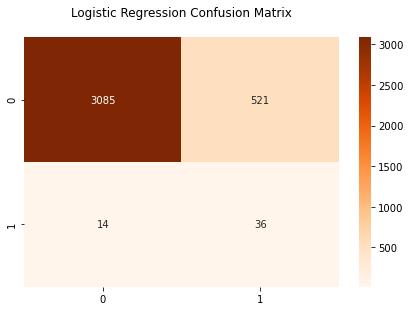

In [66]:
#Logistic Regression CM
lr_cm = confusion_matrix(predict, y)
    
sns.heatmap(lr_cm, annot=True,cmap="Oranges" , fmt='g')
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix''\n')

When checking for the accuracy score for the Logistic Regression model, it can be seen that is is relatively accurate at predicting unseen data from this dataset (85.37%). Delving in deeper into the classification report, we are able to observe that the model also has high scores for both precision, which is the fraction of relevant instances among the retrieved instances, and recall, which is the fraction of the total amount of relevant instances that were actually retrieved. This means that it is a good prediction for the '0' case. In the instance of predicting the exsistence of CHD risk, the '1' case, while it has a high score for recall, it performs badly for the precision category.

The above statements are corroborated by a confusion matrix of the scenarios. 

All in all, the Logistic Regression is definetly a great model for running a regression on the dataset. 



# **Conclusion** 

What did you find over the course of your data analysis, and how confident are you in these conclusions? 


At the beginning of this project, we set out to identify the health risk factors that play the biggest role in the risk of developing Coronary Heart Disease. Through the use of exploratory data analysis in the form of descriptive statistics, bar graphs, and swarmplots, we were able to obtain a visual representation of the spread of both nominal and continuous variables. From this exploratory analysis we were able to get a sense that certain variables would potentially play a more important role as predictors of the risk for developing CHD. However, just by visually looking at the graphs and the descriptive statistics, we weren't able to discern which variables were most important.

Building 3 variations of logistic regression models gave us a better insight into which variables would be most impactful in predicting the risk of developing CHD. By utilizing logistic regression we were easily able to compare coefficients with one another and determine which ones carry the most weight in the logistic regression model. Through single variable logistic regression with unscaled data, single variable logistic regression with scaled data, and multivariable logistic regression, we were able to discern the variables that consistently came up as being significant. We compared regression coefficients, logit probabilities and plots of the logit probability function for each variable.

In the set of single variable logistic regression models, we found that the variables that were the most signficiant were:

1. Diabetes
2. Stroke
3. Blood Pressure Medication
4. Hypertension

In the set of single variable logistic regression models with the scaled data, we found that the variables that were the most signficiant were:

1. Systolic Blood Pressure
2. Age
3. Diastolic Blood Pressure
4. Glucose

In the multivariable regression analysis model, we found that the variables that were consistently the most significant were:

1. Age
2. Systolic Blood Pressure
3. Glucose
4. Cigarettes per Day

Additionally, the glucose and systolic blood pressure logit probability plots were consistently the graphs that visually looked to have a relationship that fully and accurately spanned the entirety of their corresponding scatterplots. 

Because multivariable logistic regression requires data inputs that is scaled to one another, it makes sense that the scaled single variable set of models is mostly consistent with the multivariable logistic regression model. An interesting finding is that the most significant variables in the unscaled data models were all nominal data. However, the most significant variables in the scaled data set and multivariable data set were continuous values. 

The inconsistencies between the scaled and unscaled models are not as much of a concern as it is easy to see the medically significant relationship between the important nominal and continuous variables. For example, glucose levels are the indicator for diagnosing diabetes.  

The classification report and confusion matrix affirm our belief that logistic regression is the appropriate model for predicting and analyzing the health risks associated with the onset of CHD. 

Through the use of hypothesis testing with an alpha of 0.05, we were able to determine which of our variables were statistically significant by first, determining if P value < alpha and second, the weight of the correlation coefficient. 

We found that all four variables identified as important in the multivariable regression analysis model were further corroborated by our use of the hypothesis test. All had p values that were less than alpha = 0.05. The consistencies between the multivariable logistic regression model and the hypothesis test confirms our confidence that we have narrowed down our analysis down to the variables that are the best predictors of CHD risk.

**The four variables that we believe to have the most impact in the risk of developing Coronary Heart Disease are age, systolic blood pressure, glucose levels, and the amount of cigarettes per day.**

With this knowledge of the 4 factors that are significant in the risk for developing CHD, we can make a recommendation on the areas to target to have a statisticaly siginificant reduction in the risk of CHD. Although we are not specifically looking at the physiological conditions and biochemical pathways with downstream effects that lead to CHD, through the use of data science and logistic regression models, we have found evidence that targeting certain health factors could improve your health. Although age isn't something that can be actively changed, the 3 other important variables are all aspects that can definitely be worked on, even without medical intervention. Reducing blood pressure, glucose levels, and cigarette smoking are all aspects that an individual should work on to be healthier and reduce his or her risk of CHD. 

In a broader sense, the reason why we found this project so fascinating was thinking about the applications of data science to healthcare. Often times, it is not easy to discern the completely accurate reasoning as to why certain diseases are occurring or negative health conditions are being developed. However with enough data, correlation between certain inputs and health outputs can be just as useful in making recommendation with potential lifesaving implications.

# **Data Limitations** 

As the data presented was based on a longitudinal study that started as early as 1948, there may have been issues with the technology involved in measuring certain medical conditions. This is especially true for variables in the current medical section, such as systolic blood pressure, diastolic blood pressure, cholesterol, and glucose. 

In addition, there are some points of concerns for the validity of the reported data due to some biases. At any point, a given participant unwilling to give truthful answers due to societal pressure, or providing widely inaccurate estimations could have occurred. This issue can be found in categories from the behavioral section, such as current smoker, cigs per day and even potentially age or education, if no certification was requried (which we are not aware of) at any point. 

Moreover, there is also a certain probability of doctors misdiagnosing a participant. In accordance to a study performed by BMJ Quality & Safety, 5% of the adults who seek outpatient medical care receive a misdiagnosis. Hence,  for some categories in the medical history section, such as hypertension or diabetes there is a chance that a participant could’ve wrongly received a diagnosis. 

Lastly, while this dataset has an extensive amount of participants, applying our results based on just over 3600 data entries to an even bigger population may potentially yield inaccurate results. Hence, we will have to be careful with interpreting our outcomes.

# **Source Code** 

Github Repository Link:

https://github.com/waiyannaing/Coronary-Heart-Disesase-Risk-Factor-Analysis

# **Acknowledgments** 

This project was done in conjunction with Cornell University's Department of Information Science INFO2950 Course taken in the Fall of 2020. We would like to thank Professor David Mimno and the INFO2950 course staff for their guidance throughout this project.

# **Appendix** 

Link to Data Cleaning

https://github.com/waiyannaing/Coronary-Heart-Disesase-Risk-Factor-Analysis/blob/main/Data-Cleaning.ipynb

The curated dataset file can be found at the link below:

https://drive.google.com/file/d/1FrD7v2XudKIc9Y9bOdwI5vhBlAhl0JK9/view?usp=sharing
